In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble


In [11]:
data = pd.read_csv('../dataset/Weather.csv')

In [13]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01    Delhi     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02    Delhi      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03    Delhi     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04    Delhi      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05    Delhi     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1       8.0       NaN     16.9     21.8         No            No   
1       1007.8       NaN       NaN     17.2     24.3         No            No   
2       1008.7       NaN       2.0     21.0     23.2         No            No   
3       1012.8       NaN       NaN     18.1     26.5         No            No   
4       1006.0       7.0       8.0     17.8     29.7         No            No   

    @  
0 NaN  
1 NaN  
2 NaN  
3 NaN  
4 NaN  

[5 rows x 24 columns]

In [14]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm    @  
count  89572.000000  86102.000000  143693.000000  141851.00000  0.0  
mean       4.447461      4.509930      16.990631      21.68339  NaN  
std        2.887159      2.720357       6.488753       6.93665  NaN  
min        0.000000      0.000000      -7.200000      -5.40000  NaN  
25%        1.000000      2.000000      12.300000      16.60000  NaN  
50%        5.000000      5.000000      16.700000      21.10000  NaN  
75%        7.000000      7.000000      21.600000      26.40000  NaN  
max        9.000000      9.000000      40.200000      46.70000  NaN

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [16]:
data.shape

(145460, 24)

In [17]:
data.isnull().sum()

Date                  0
Location              0
MinTemp            1485
MaxTemp            1261
Rainfall           3261
Evaporation       62790
Sunshine          69835
WindGustDir       10326
WindGustSpeed     10263
WindDir9am        10566
WindDir3pm         4228
WindSpeed9am       1767
WindSpeed3pm       3062
Humidity9am        2654
Humidity3pm        4507
Pressure9am       15065
Pressure3pm       15028
Cloud9am          55888
Cloud3pm          59358
Temp9am            1767
Temp3pm            3609
RainToday          3261
RainTomorrow       3253
@                145460
dtype: int64

In [18]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

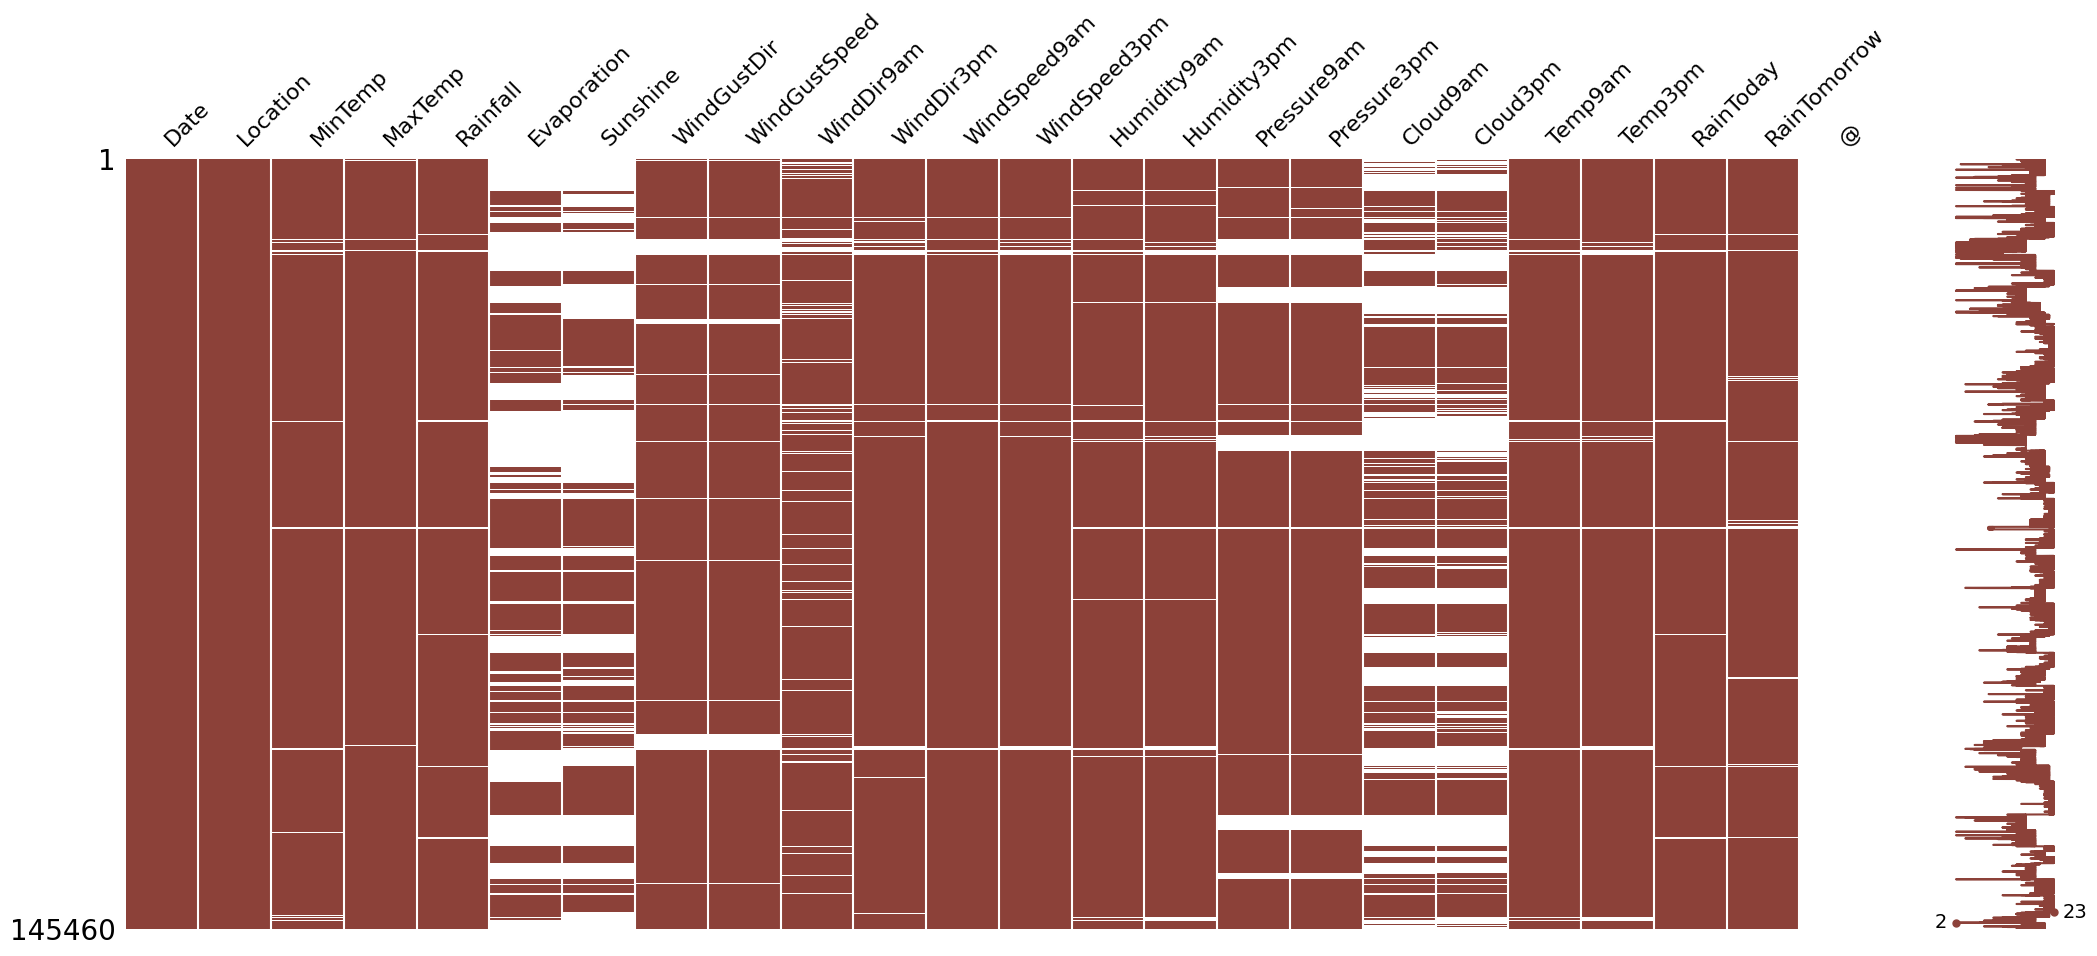

In [19]:
import missingno as msno 
msno.matrix(
    data,
    color=(0.55, 0.255, 0.225),  # brownish color for present data
    fontsize=16
)

In [20]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Assume 'data' is your pandas DataFrame containing the weather dataset

# 1) Removing columns with more than 20% missing values and segregating cat/num vars
# (Adjust the column lists as needed for your dataset)
data_cat = data[['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm']].copy()

# Drop some columns (example from screenshot)
data.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)
data.drop(columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1, inplace=True)

# 2) Filling the missing data of numeric variables with mean
# (Ensure these columns exist in your DataFrame)
numeric_cols = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'
]

for col in numeric_cols:
    if col in data.columns:
        data[col].fillna(data[col].mean(), inplace=True)

# 3) Loading the names of categorical columns (from data_cat)
cat_names = data_cat.columns

# 4) Initializing the simple imputer for missing categorical values
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# 5) Fitting and transforming the missing data for categorical vars
data_cat = imp_mode.fit_transform(data_cat)

# 6) Converting array back to DataFrame
data_cat = pd.DataFrame(data_cat, columns=cat_names)

# 7) Concatenating the categorical and numeric data
# Note: If you dropped categorical columns earlier, you may want to re-assemble differently.
data = pd.concat([data, data_cat], axis=1)

# Optional: Reset index if needed
data.reset_index(drop=True, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_27432\3032532233.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [21]:
data.corr(numeric_only=True)

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.733400  0.102706       0.172553      0.173404   
MaxTemp        0.733400  1.000000 -0.074040       0.065895      0.014294   
Rainfall       0.102706 -0.074040  1.000000       0.126446      0.085925   
WindGustSpeed  0.172553  0.065895  0.126446       1.000000      0.577319   
WindSpeed9am   0.173404  0.014294  0.085925       0.577319      1.000000   
WindSpeed3pm   0.173058  0.049717  0.056527       0.657243      0.512427   
Humidity9am   -0.230970 -0.497927  0.221380      -0.207964     -0.268271   
Humidity3pm    0.005995 -0.498760  0.248905      -0.025355     -0.030887   
Pressure9am   -0.423584 -0.308309 -0.159055      -0.425760     -0.215339   
Pressure3pm   -0.433147 -0.396622 -0.119541      -0.383938     -0.165388   
Temp9am        0.897692  0.879170  0.011069       0.145904      0.127592   
Temp3pm        0.699211  0.968713 -0.077684       0.031884      0.004476   
@                   NaN       NaN       NaN            NaN           NaN   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp            0.173058    -0.230970     0.005995    -0.423584   
MaxTemp            0.049717    -0.497927    -0.498760    -0.308309   
Rainfall           0.056527     0.221380     0.248905    -0.159055   
WindGustSpeed      0.657243    -0.207964    -0.025355    -0.425760   
WindSpeed9am       0.512427    -0.268271    -0.030887    -0.215339   
WindSpeed3pm       1.000000    -0.143458     0.016275    -0.277604   
Humidity9am       -0.143458     1.000000     0.659072     0.131503   
Humidity3pm        0.016275     0.659072     1.000000    -0.025848   
Pressure9am       -0.277604     0.131503    -0.025848     1.000000   
Pressure3pm       -0.239659     0.176009     0.048695     0.959662   
Temp9am            0.161060    -0.469641    -0.216964    -0.397131   
Temp3pm            0.027587    -0.490709    -0.555608    -0.265532   
@                       NaN          NaN          NaN          NaN   

               Pressure3pm   Temp9am   Temp3pm   @  
MinTemp          -0.433147  0.897692  0.699211 NaN  
MaxTemp          -0.396622  0.879170  0.968713 NaN  
Rainfall         -0.119541  0.011069 -0.077684 NaN  
WindGustSpeed    -0.383938  0.145904  0.031884 NaN  
WindSpeed9am     -0.165388  0.127592  0.004476 NaN  
WindSpeed3pm     -0.239659  0.161060  0.027587 NaN  
Humidity9am       0.176009 -0.469641 -0.490709 NaN  
Humidity3pm       0.048695 -0.216964 -0.555608 NaN  
Pressure9am       0.959662 -0.397131 -0.265532 NaN  
Pressure3pm       1.000000 -0.441459 -0.360707 NaN  
Temp9am          -0.441459  1.000000  0.846141 NaN  
Temp3pm          -0.360707  0.846141  1.000000 NaN  
@                      NaN       NaN       NaN NaN

<Axes: >

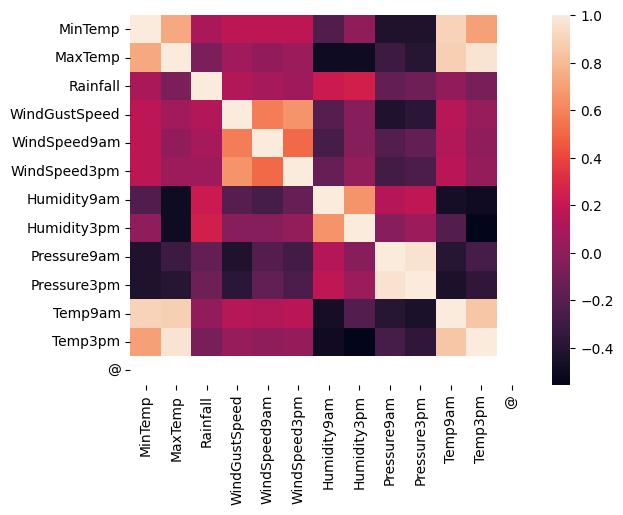

In [22]:
cor = data.corr(numeric_only=True)
sns.heatmap(data=cor, xticklabels=cor.columns.values, yticklabels=cor.columns.values)

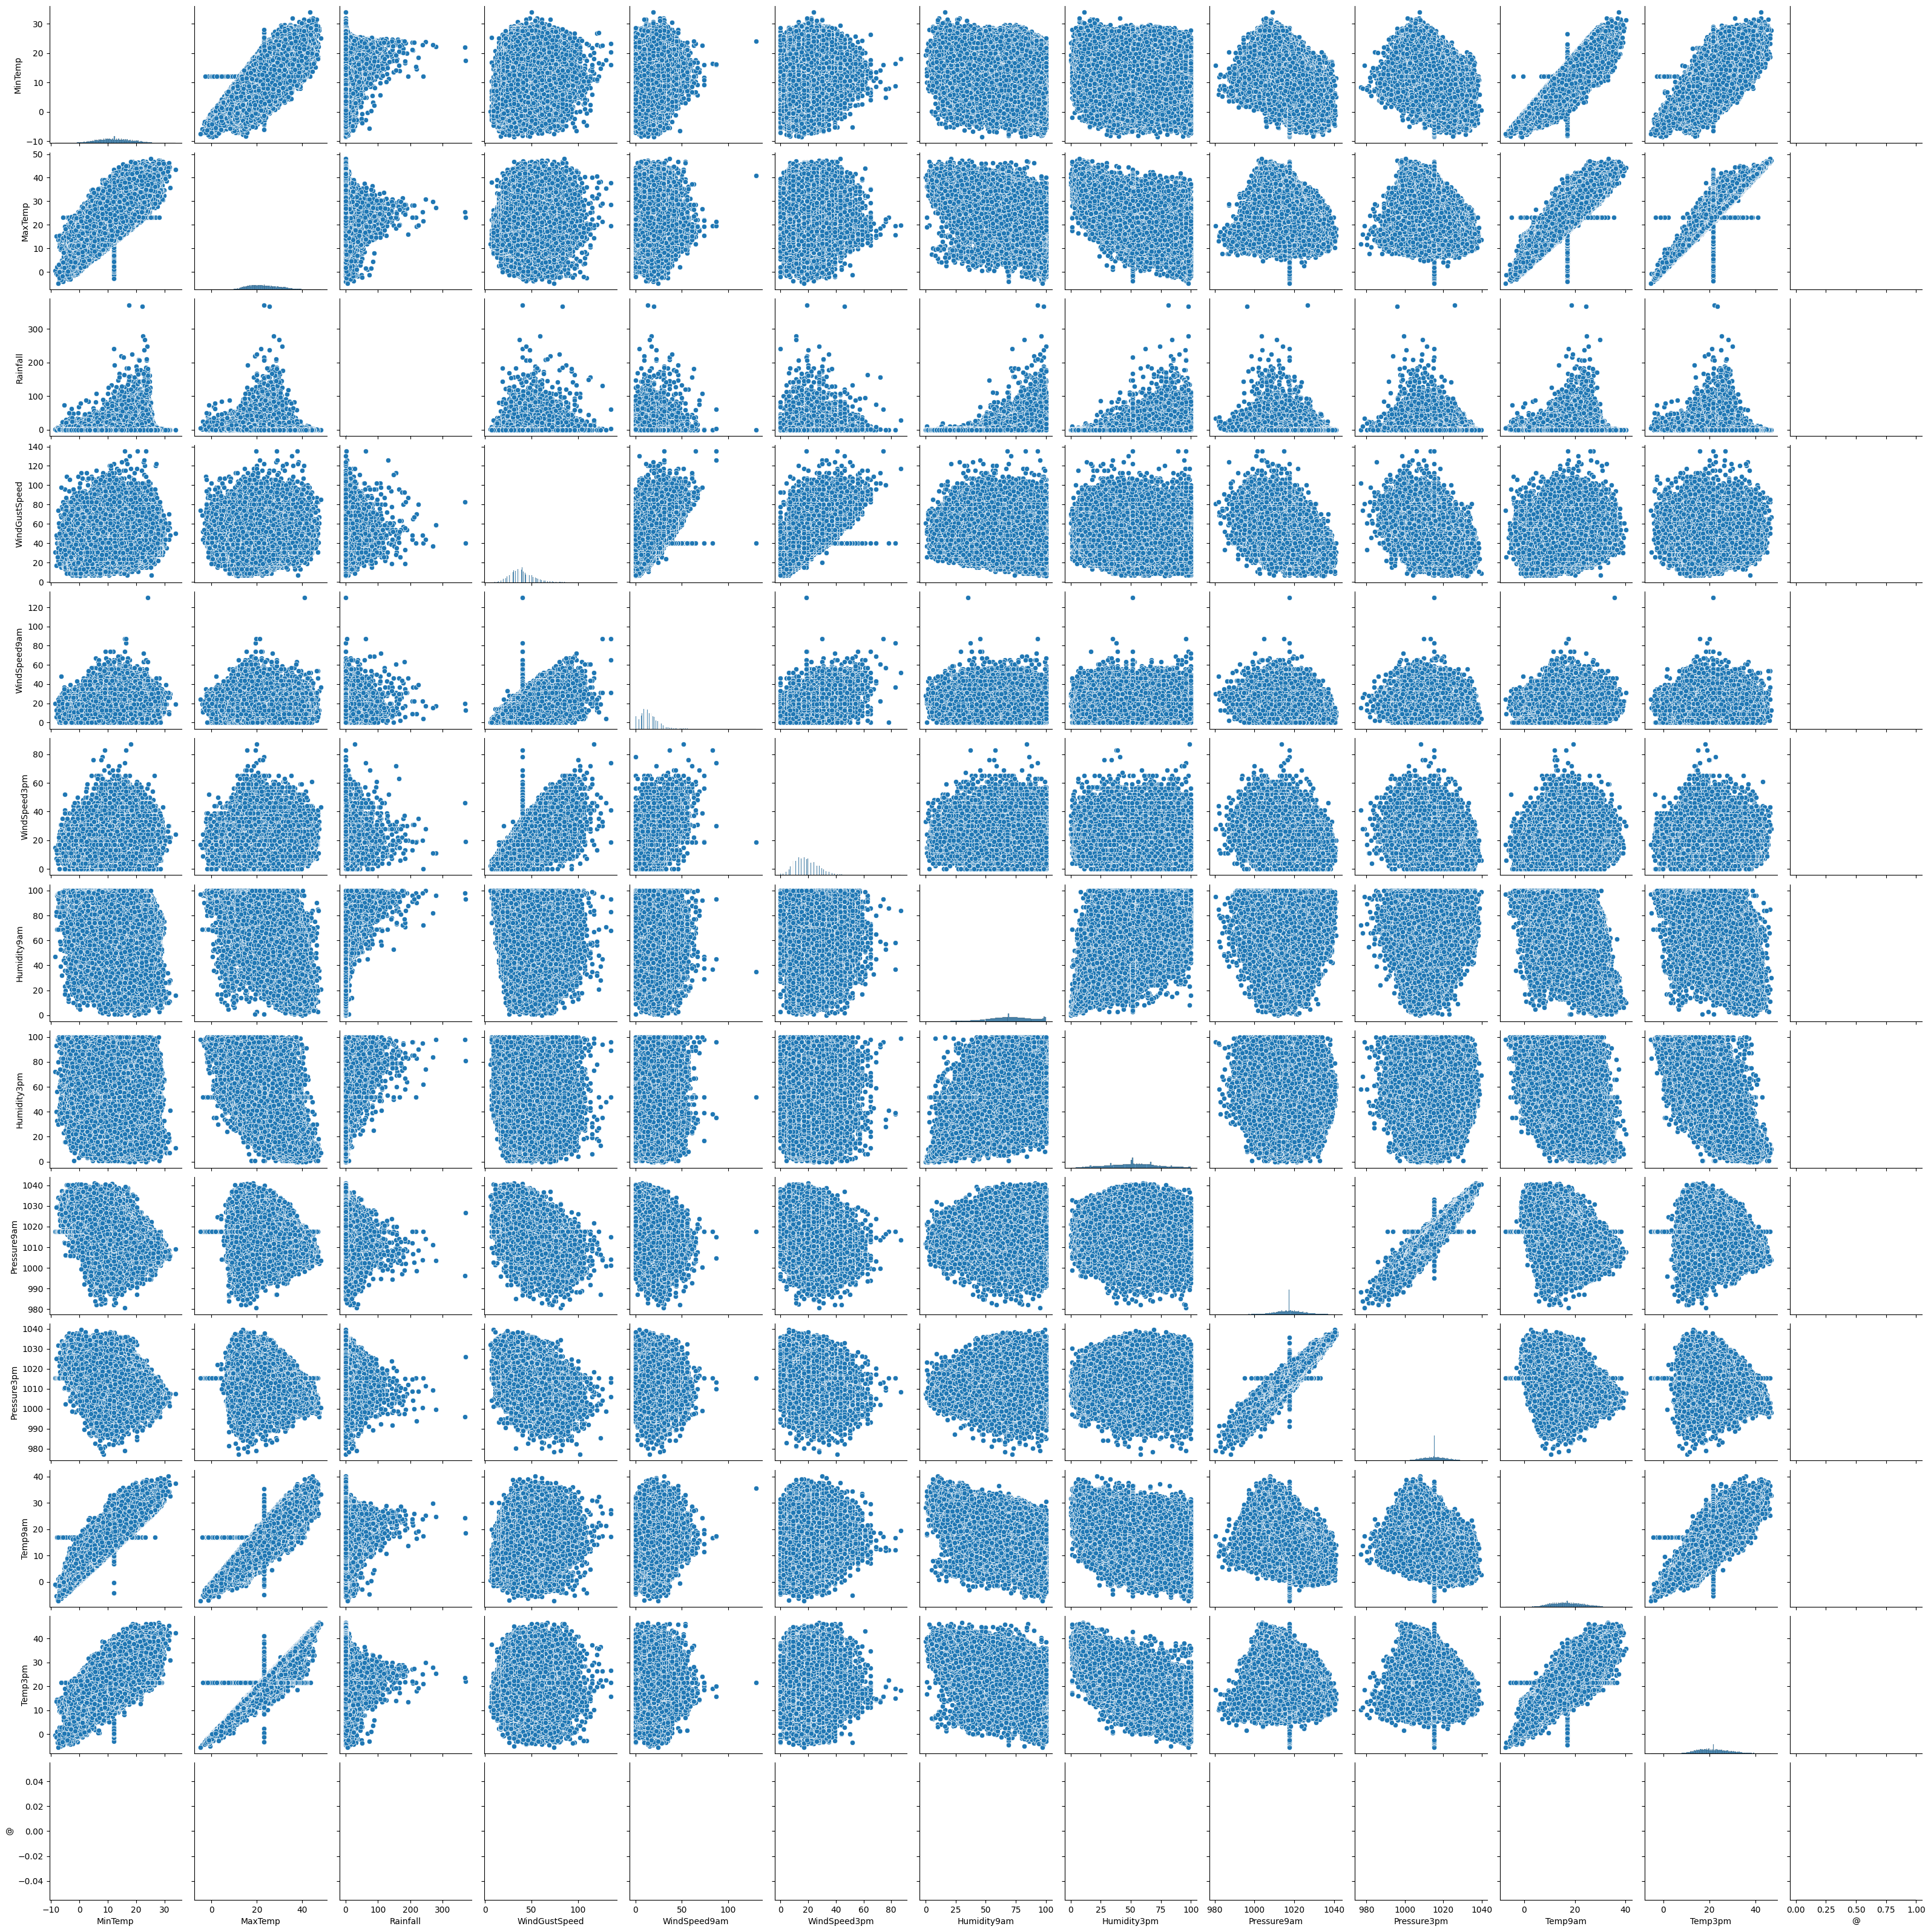

In [23]:
sns.pairplot(data)

<Axes: >

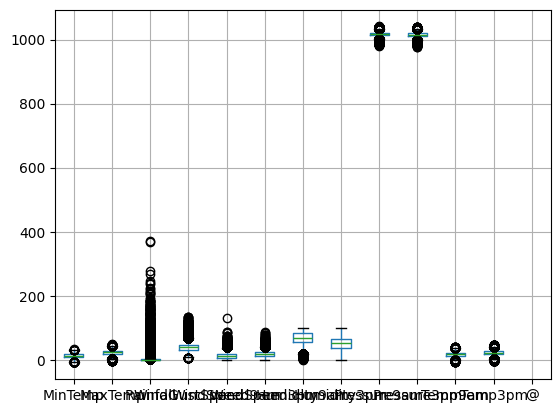

In [24]:
data.boxplot()

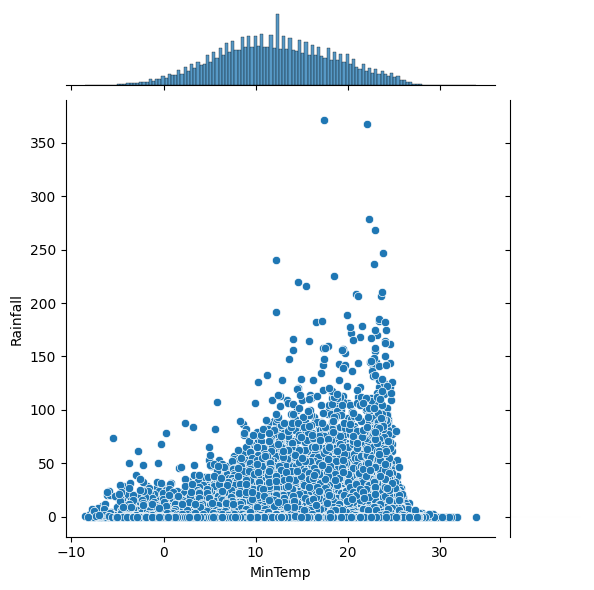

In [25]:
sns.jointplot(data=data, x="MinTemp", y="Rainfall")

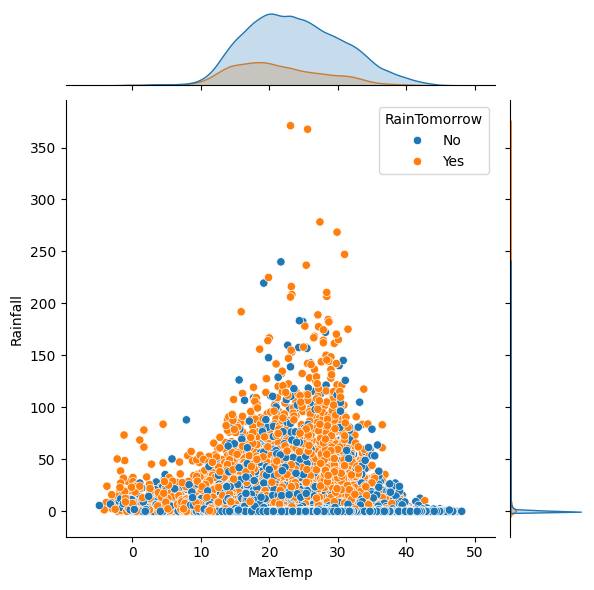

In [26]:
sns.jointplot(data=data, x="MaxTemp", y="Rainfall", hue="RainTomorrow")

<Axes: xlabel='RainTomorrow', ylabel='Count'>

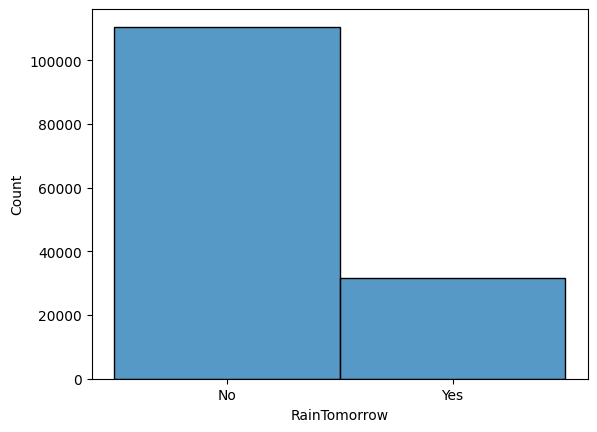

In [27]:
sns.histplot(data['RainTomorrow'])

<Axes: xlabel='MaxTemp', ylabel='Rainfall'>

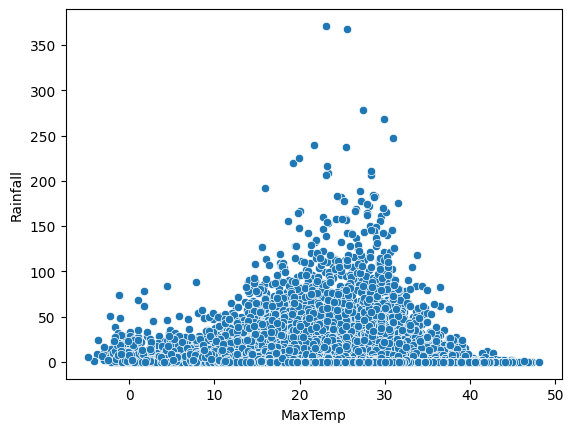

In [28]:
sns.scatterplot(x=data['MaxTemp'], y=data['Rainfall'])

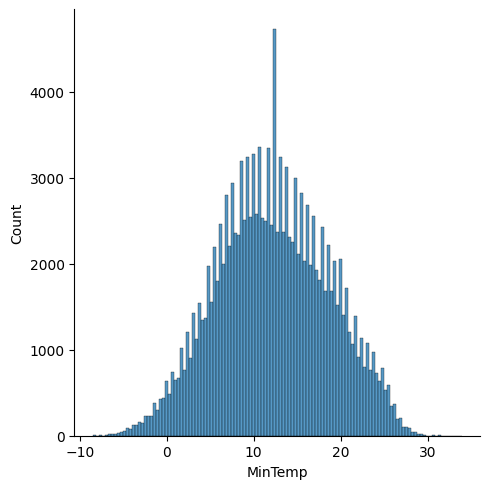

In [29]:
sns.displot(data['MinTemp'])

In [30]:
y = data['RainTomorrow']
x = data.drop('RainTomorrow', axis=1)

In [31]:
from sklearn.preprocessing import StandardScaler

In [33]:
y = data['RainTomorrow']
x = data.drop('RainTomorrow', axis=1)

In [34]:
names = x.columns

In [35]:
names


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', '@', 'RainToday',
       'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype='object')

In [36]:
sc = StandardScaler()

In [37]:
x_numeric = x.select_dtypes(include=[np.number])
x = sc.fit_transform(x_numeric)

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [38]:
x = pd.DataFrame(x, columns=x_numeric.columns)

In [39]:
from sklearn import model_selection

In [40]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.2,random_state=0)

Model Building

In [41]:
import xgboost as xgb
from sklearn import ensemble, svm, tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [42]:
XGBoost = xgb.XGBRFClassifier()              # If you intended XGBoost RF variant; otherwise consider XGBClassifier
Rand_forest = ensemble.RandomForestClassifier()
svm_model = svm.SVC()
Dtree = tree.DecisionTreeClassifier()
GBM = ensemble.GradientBoostingClassifier()
log = LogisticRegression(max_iter=1000)

In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Drop the '@' column which contains all NaN values
x_train_clean = x_train.drop(columns=['@'])
x_test_clean = x_test.drop(columns=['@'])

XGBoost.fit(x_train_clean, y_train_encoded)
Rand_forest.fit(x_train_clean, y_train_encoded)
svm_model.fit(x_train_clean, y_train_encoded)
Dtree.fit(x_train_clean, y_train_encoded)
GBM.fit(x_train_clean, y_train_encoded)
log.fit(x_train_clean, y_train_encoded)

LogisticRegression(max_iter=1000)

In [54]:

p1 = XGBoost.predict(x_train)
p2 = Rand_forest.predict(x_train)
p3 = svm_model.predict(x_train)
p4 = Dtree.predict(x_train)
p5 = GBM.predict(x_train)
p6 = log.predict(x_train)


In [67]:
# Remove useless column
data = data.drop(columns=['@'])

# Drop missing target rows
data = data.dropna(subset=['RainTomorrow'])

# Encode target
data['RainTomorrow'] = (
    data['RainTomorrow']
    .astype(str)
    .str.strip()
    .str.lower()
    .map({'no': 0, 'yes': 1})
)


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['RainTomorrow'])
y = data['RainTomorrow']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
